# Network oscilators 

## Kuramoto

$$\frac{d\theta_i}{dt} = \omega_i + \sum^{N}_{j=1}a_{ij}\ sin(\theta_j - \theta_i)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from scipy.integrate import odeint

In [2]:
def circular_network(n, m=1):
    a_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(1, m + 1):
            a_matrix[i][(i + j) % n] = 1
            a_matrix[-i][-(i + j) % n] = 1
            
    return a_matrix


def kuramoto(theta_t, t, adj_matrix, omega):
    theta_i, theta_j = np.meshgrid(theta_t, theta_t)
    
    return omega + (adj_matrix * np.sin(theta_j - theta_i)).sum(axis=0)

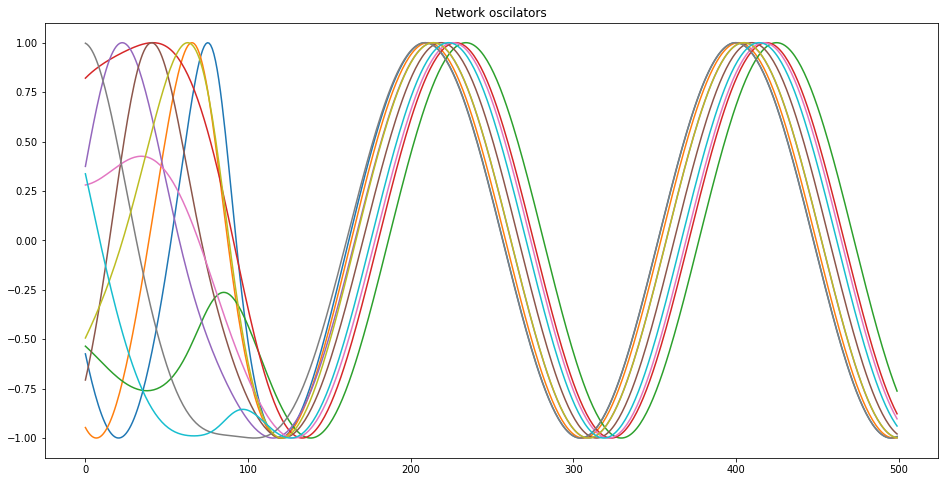

In [3]:
t_max = 5
dt = 1 / 100

n = 10

adj_matrix = circular_network(n, m=3)
omega = np.random.rand(n) * 2 * np.pi
theta = np.random.rand(n) * 4 * np.pi - 2 * np.pi

t = np.linspace(0, t_max, int(t_max / dt))
timeseries = odeint(kuramoto, theta, t, args=(adj_matrix, omega))

plt.figure(figsize=(16, 8))
plt.title("Network oscilators")
plt.plot(np.sin(timeseries))
plt.show()

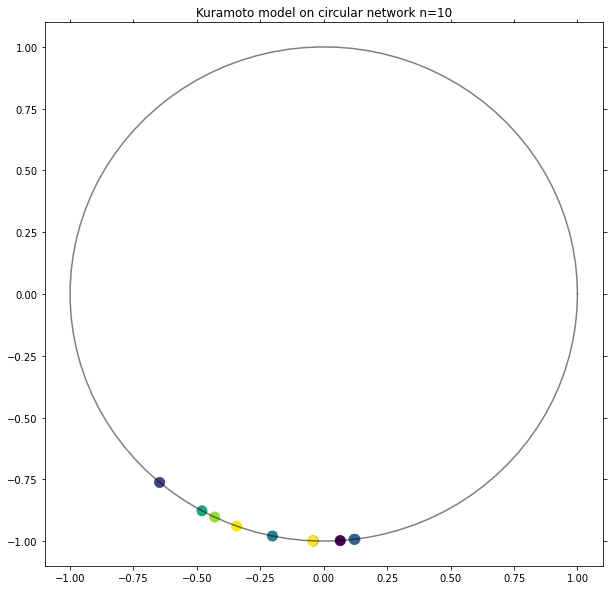

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
color = np.random.rand(n)

def update(i):
    ax.clear()
    plt.title(f"Kuramoto model on circular network n={n}")
    ax.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), "k-", alpha=0.5)
    ax.scatter(np.cos(timeseries[i]), np.sin(timeseries[i]), s=100, c=color)

# update(0)
animator = ani.FuncAnimation(fig, update, frames=int(t_max / dt), interval=50)
animator.save("kuramoto.gif", writer="pillow")

![](./kuramoto.gif)